In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [9]:
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

ph
Skewness: 0.025630447632210205
Kurtosis: 0.7203155798283807


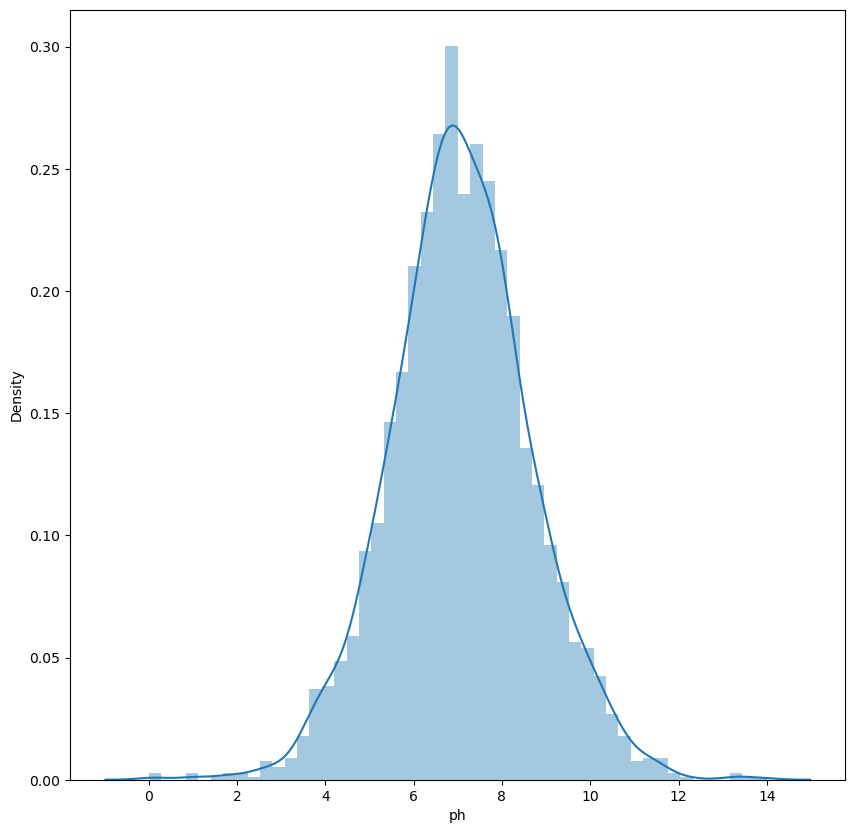

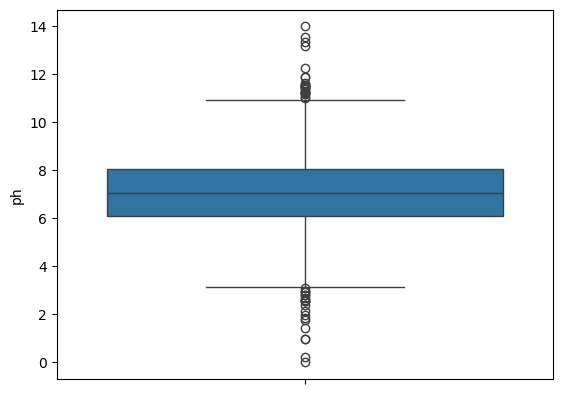

Hardness
Skewness: -0.0393417047767249
Kurtosis: 0.6157716821342123


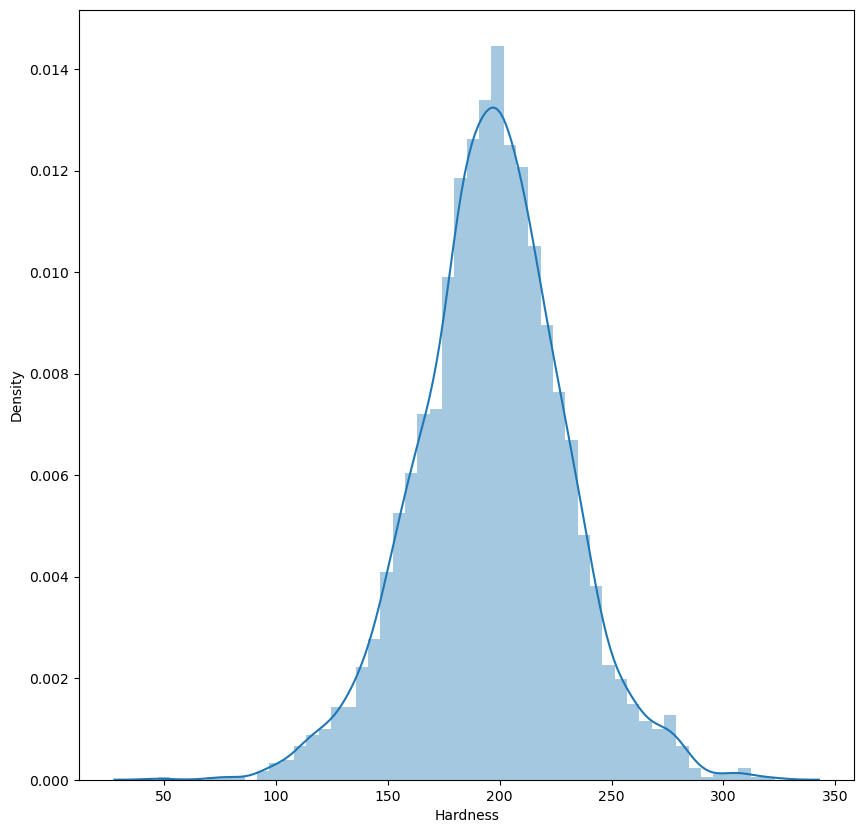

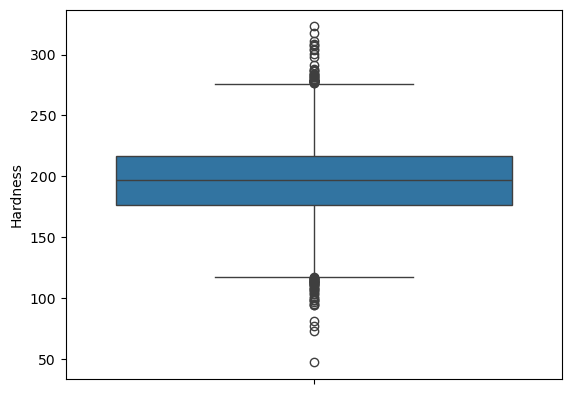

Solids
Skewness: 0.6216344855169127
Kurtosis: 0.4428260857797124


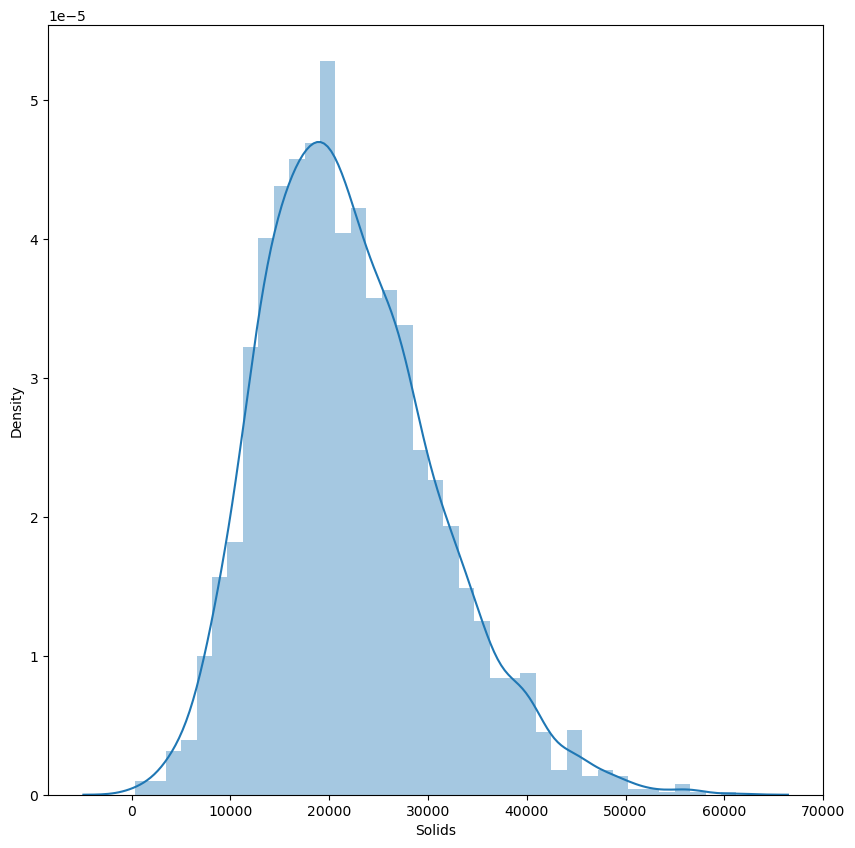

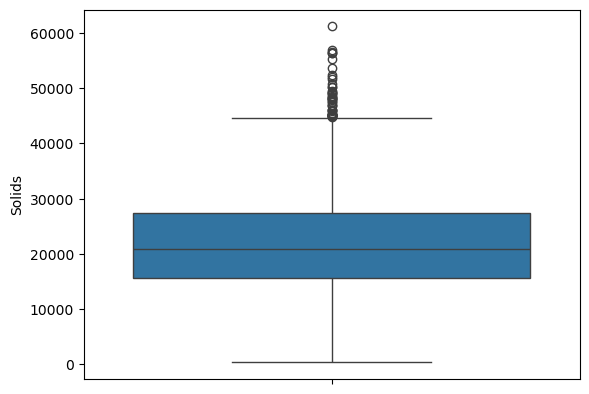

Chloramines
Skewness: -0.01209844012438221
Kurtosis: 0.5899011685623812


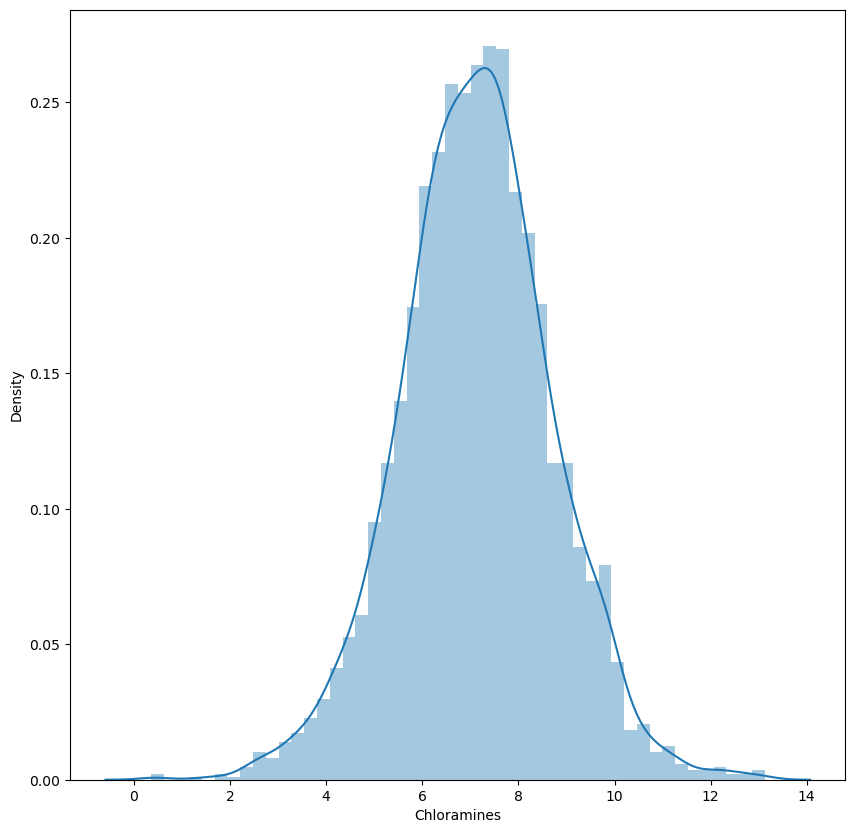

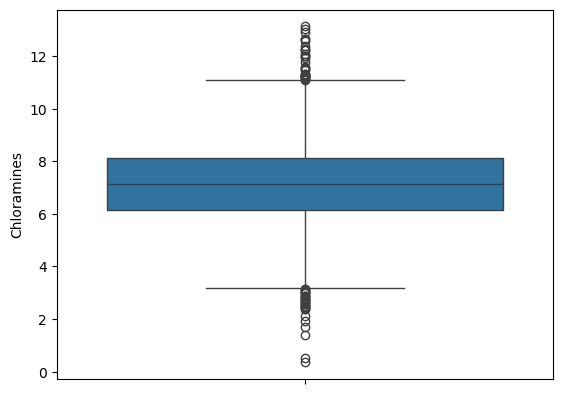

Sulfate
Skewness: -0.03594662160706187
Kurtosis: 0.6482628149948058


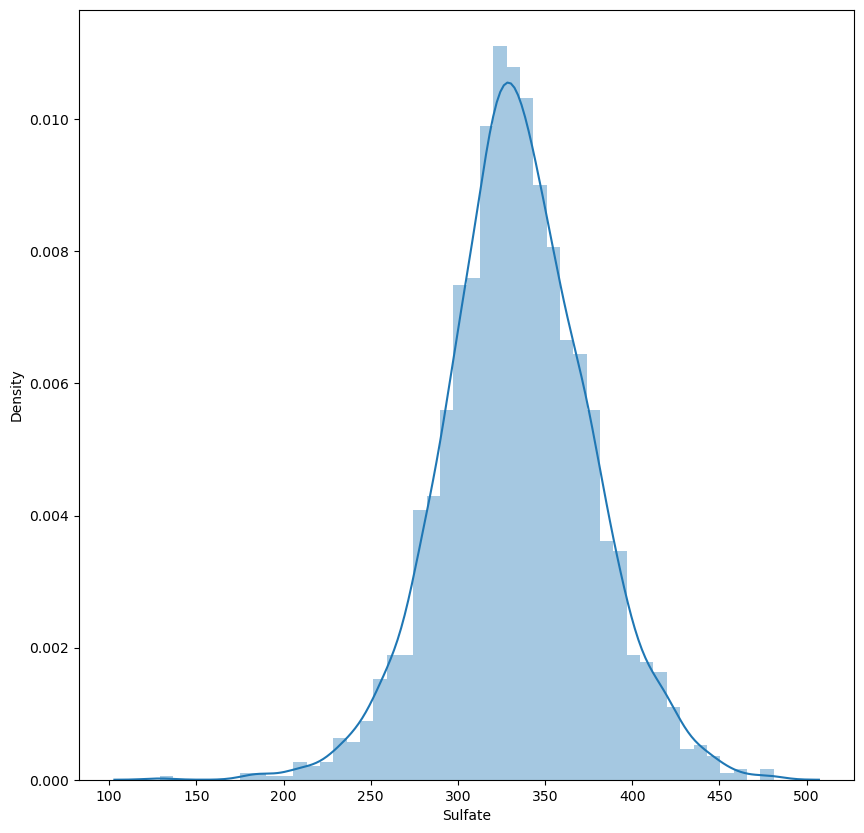

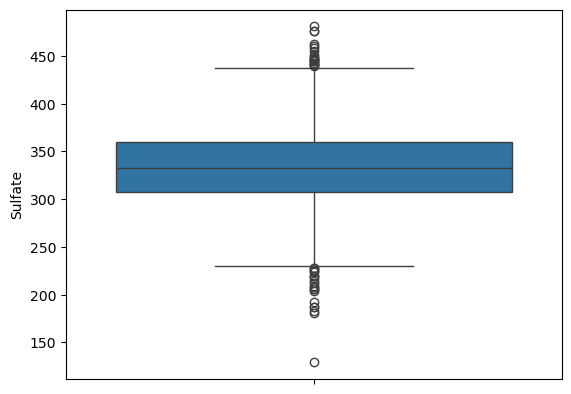

Conductivity
Skewness: 0.2644902239264119
Kurtosis: -0.2770928328764719


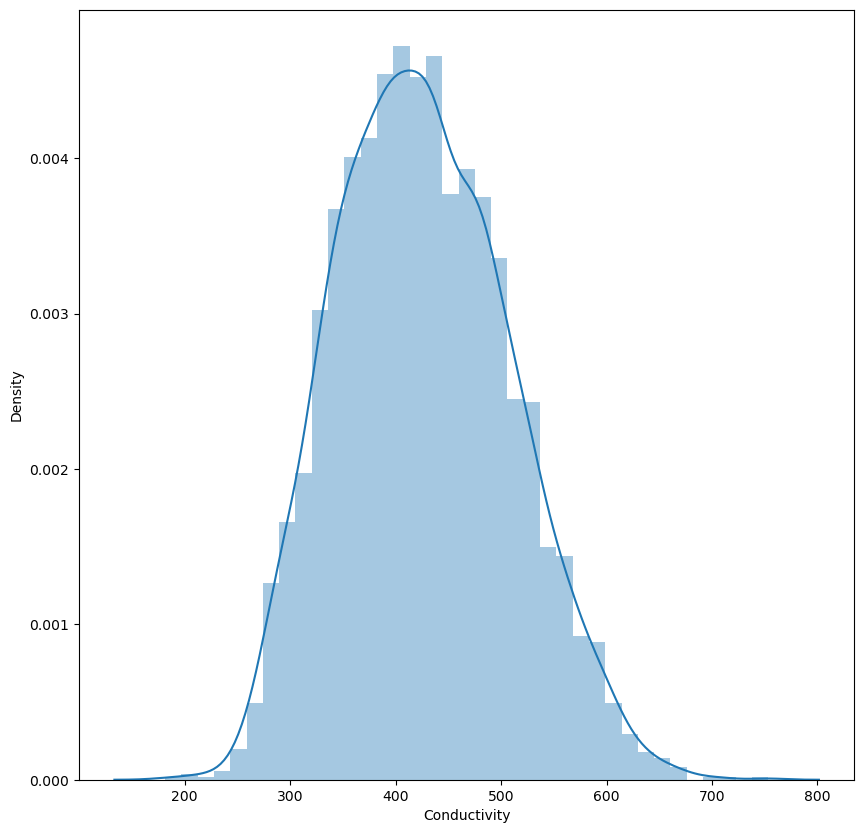

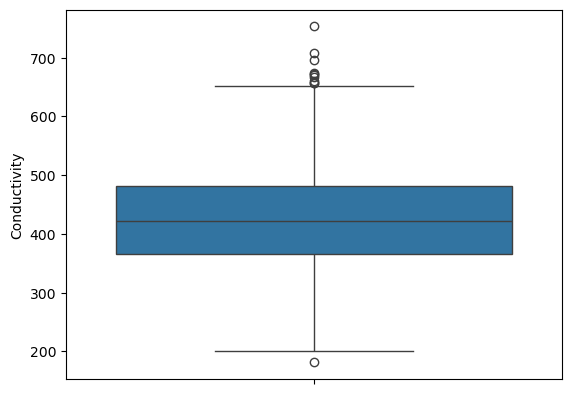

Organic_carbon
Skewness: 0.025532582090242492
Kurtosis: 0.04440930714537439


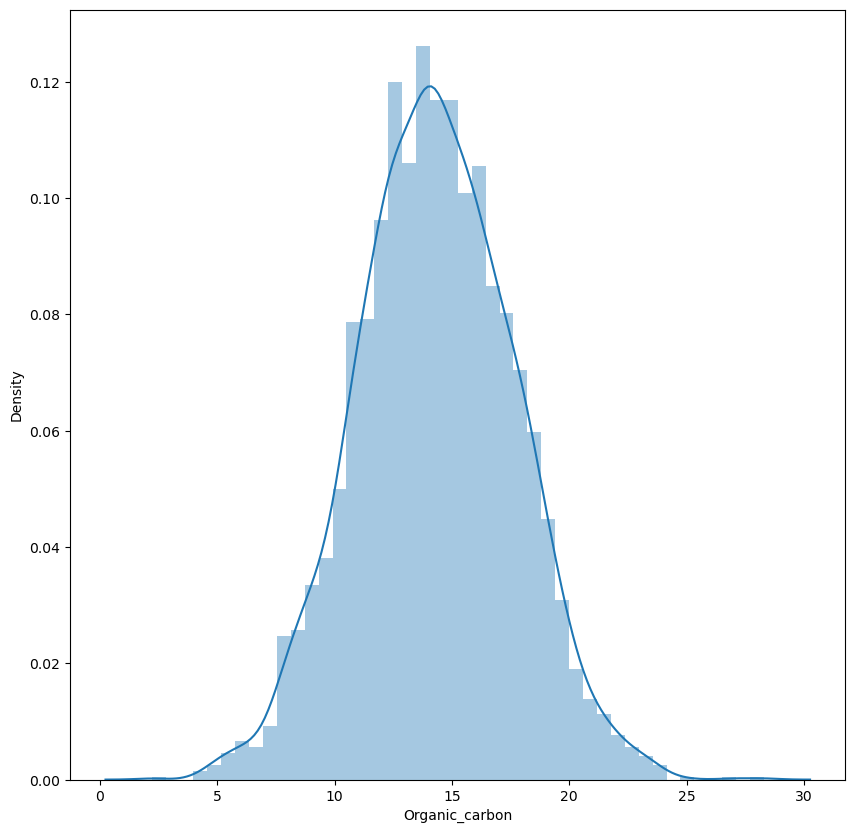

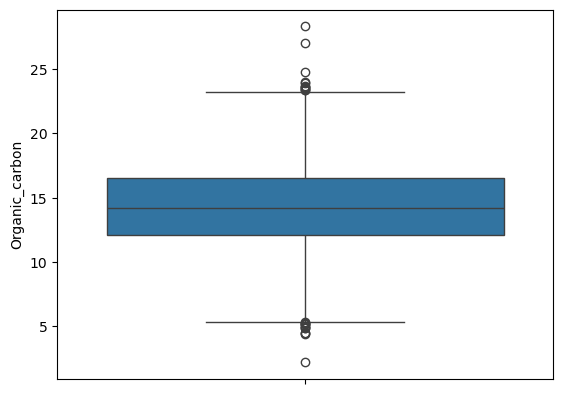

Trihalomethanes
Skewness: -0.08303067407901553
Kurtosis: 0.2385974402088653


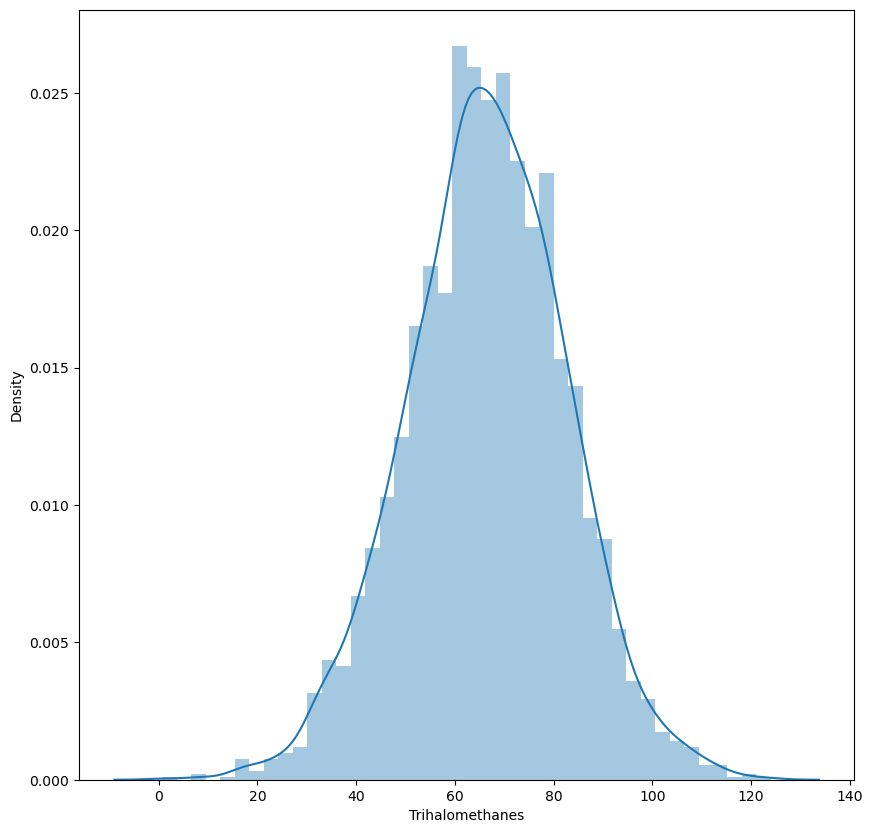

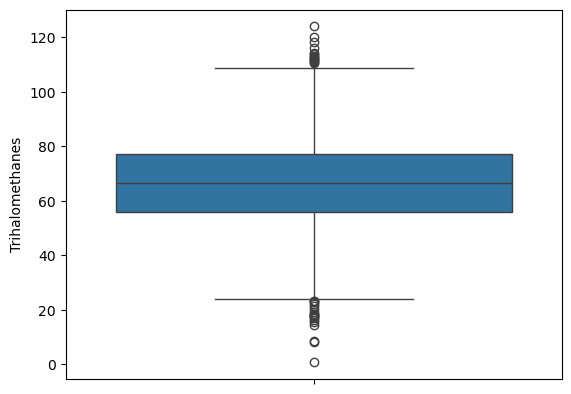

Turbidity
Skewness: -0.007816642377392604
Kurtosis: -0.06280064052220302


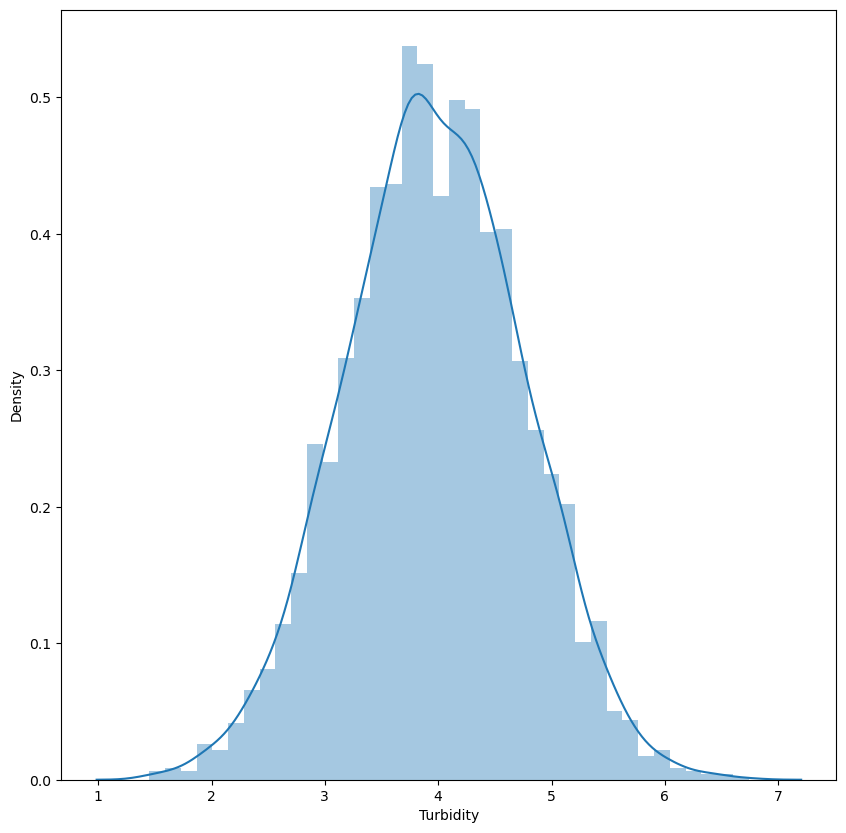

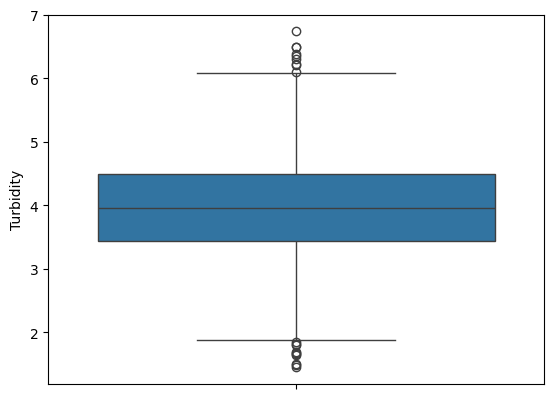

Potability
Skewness: 0.4507837491078628
Kurtosis: -1.7978919987325783


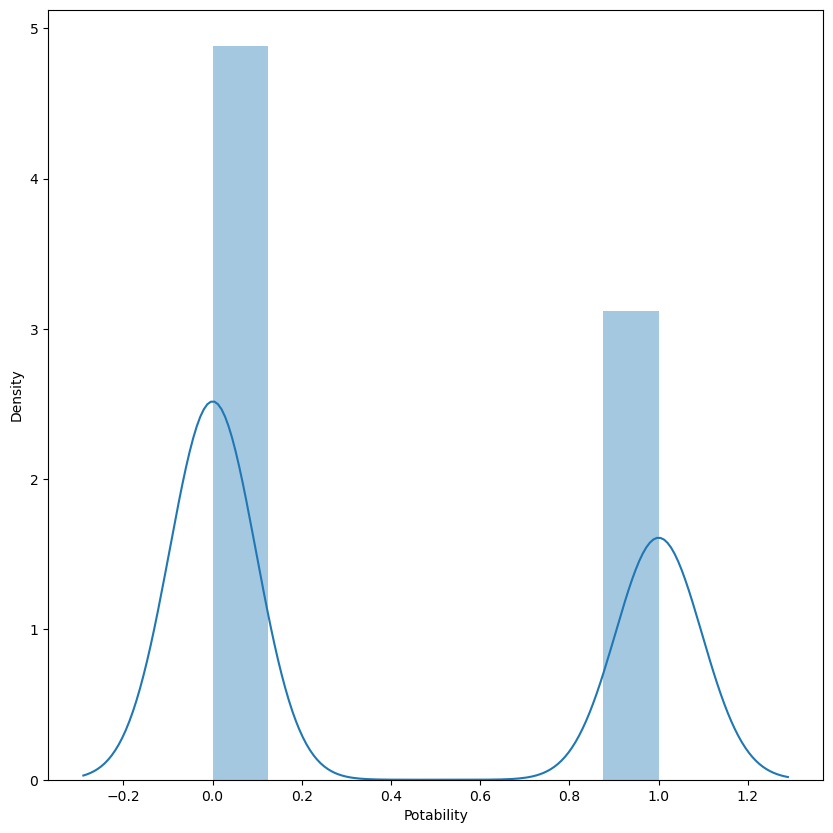

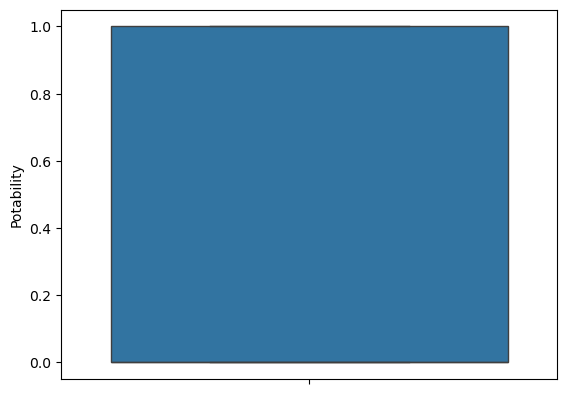

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
for col in df.columns:
    print(col)
    print("Skewness:",df[col].skew())
    print("Kurtosis:",df[col].kurt())
    plt.figure(figsize=(10,10))
    sns.distplot(df[col])
    plt.show()
    sns.boxplot(df[col])
    plt.show()

posx and posy should be finite values
posx and posy should be finite values


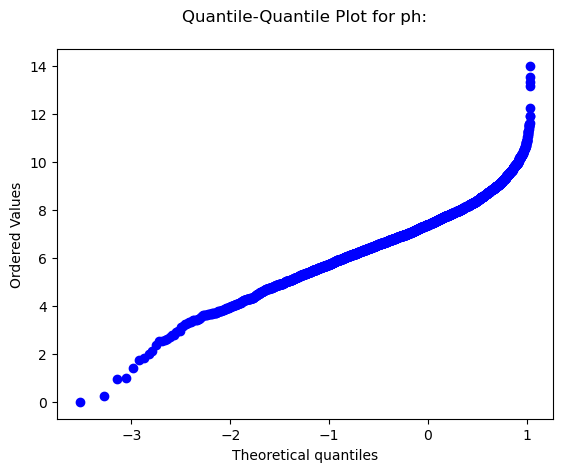

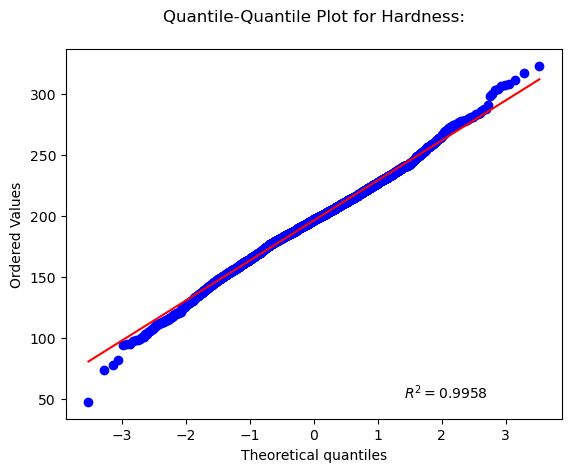

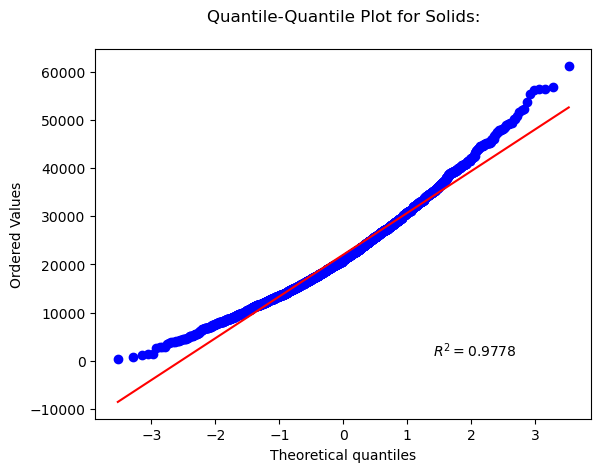

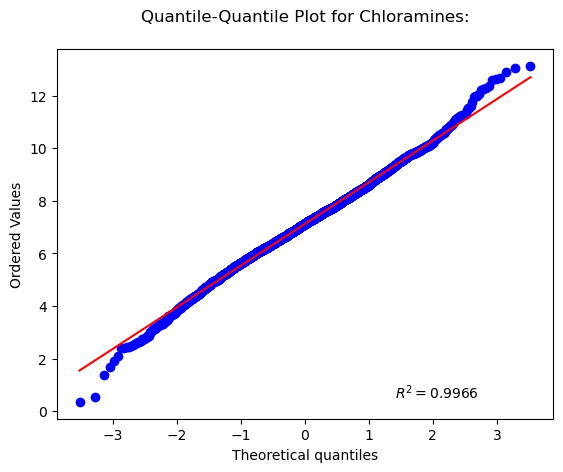

posx and posy should be finite values
posx and posy should be finite values


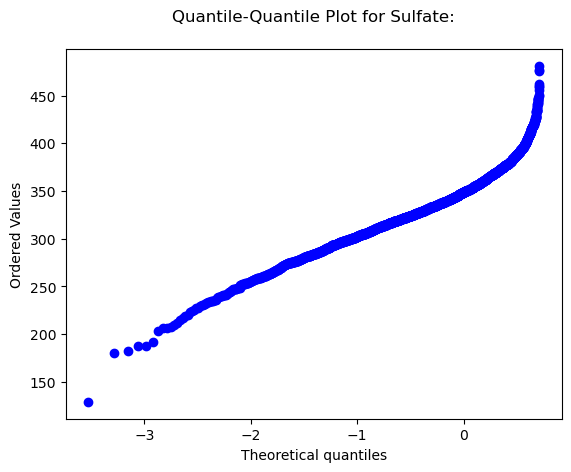

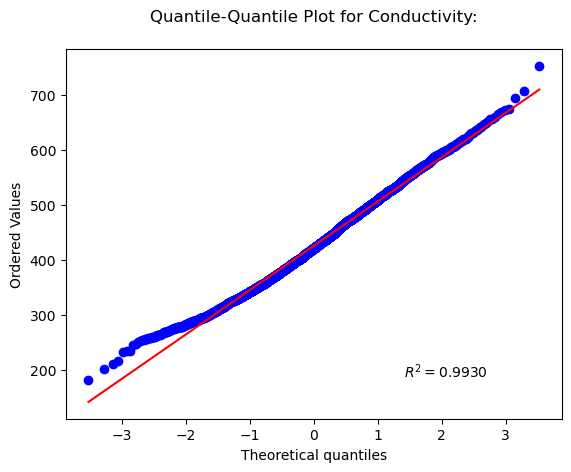

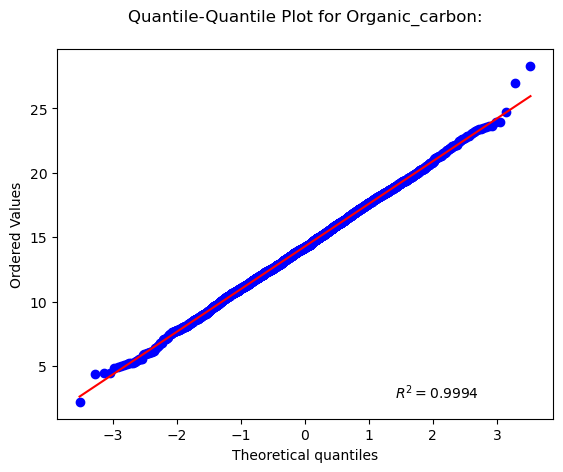

posx and posy should be finite values
posx and posy should be finite values


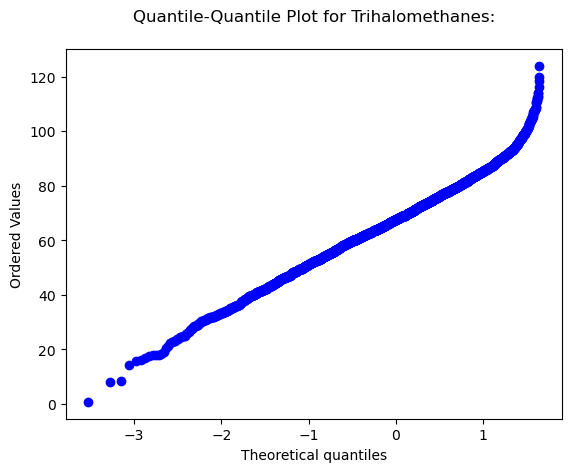

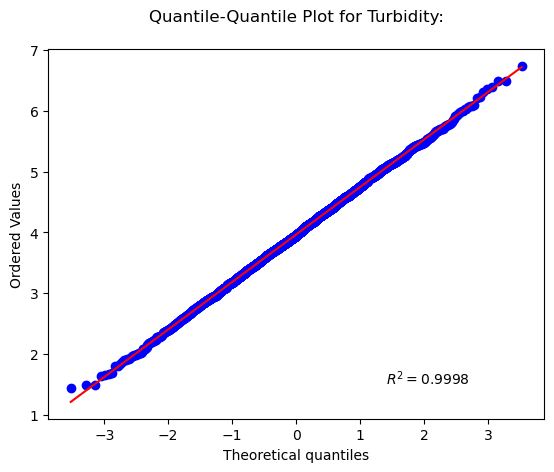

In [15]:
import scipy, joblib
for col in df.columns:
    if col != 'Potability':
        scipy.stats.probplot(df[col],plot=plt,rvalue=True)
        plt.title('Quantile-Quantile Plot for {}:'.format(col),pad=20)
        plt.show()

In [17]:
df.corr()['Potability'].sort_values(ascending=False)[1:]

Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [19]:
df.groupby('Potability')[['Solids','Chloramines','Trihalomethanes','ph','Turbidity','Conductivity','Hardness','Sulfate','Organic_carbon']].mean().reset_index()

Potability        Solids  Chloramines  Trihalomethanes        ph  \
0           0  21777.490788     7.092175        66.303555  7.085378   
1           1  22383.991018     7.169338        66.539684  7.073783   

   Turbidity  Conductivity    Hardness    Sulfate  Organic_carbon  
0   3.965800    426.730454  196.733292  334.56429       14.364335  
1   3.968328    425.383800  195.800744  332.56699       14.160893

In [21]:
pd.pivot_table(df,index='Potability',
               values=['Solids','Chloramines','Trihalomethanes','ph','Turbidity','Conductivity','Hardness','Sulfate','Organic_carbon'],
               aggfunc=[np.mean,np.median]
           )

mean                                                        \
           Chloramines Conductivity    Hardness Organic_carbon        Solids   
Potability                                                                     
0             7.092175   426.730454  196.733292      14.364335  21777.490788   
1             7.169338   425.383800  195.800744      14.160893  22383.991018   

                                                               median  \
              Sulfate Trihalomethanes Turbidity        ph Chloramines   
Potability                                                              
0           334.56429       66.303555  3.965800  7.085378    7.090334   
1           332.56699       66.539684  3.968328  7.073783    7.215163   

                                                                              \
           Conductivity    Hardness Organic_carbon        Solids     Sulfate   
Potability                                                                     
0            422.229331  197.123423      14.293508  20809.618280  333.389426   
1            420.712729  196.632907      14.162809  21199.386614  331.838167   

                                                
           Trihalomethanes Turbidity        ph  
Potability                                      
0                66.542198  3.948076  7.035456  
1                66.678214  3.958576  7.036752

In [23]:
for col in ['ph','Sulfate','Trihalomethanes']:
    df[col].fillna(df[col].mean(),inplace=True)

In [25]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [27]:
#Capping
for col in df.columns:
    if col not in ['ph','Potability']:
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]<lower_whisker,lower_whisker,np.where(df[col]>upper_whisker,upper_whisker,df[col]))

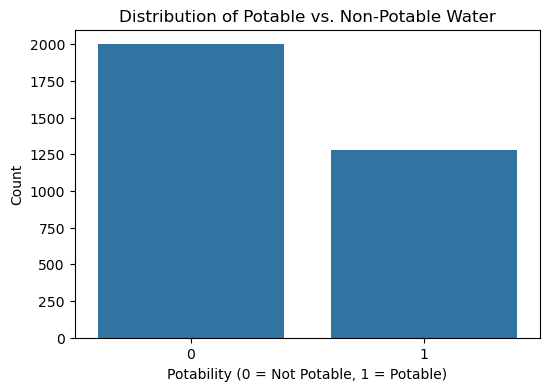

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df["Potability"])
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.title("Distribution of Potable vs. Non-Potable Water")
plt.show()


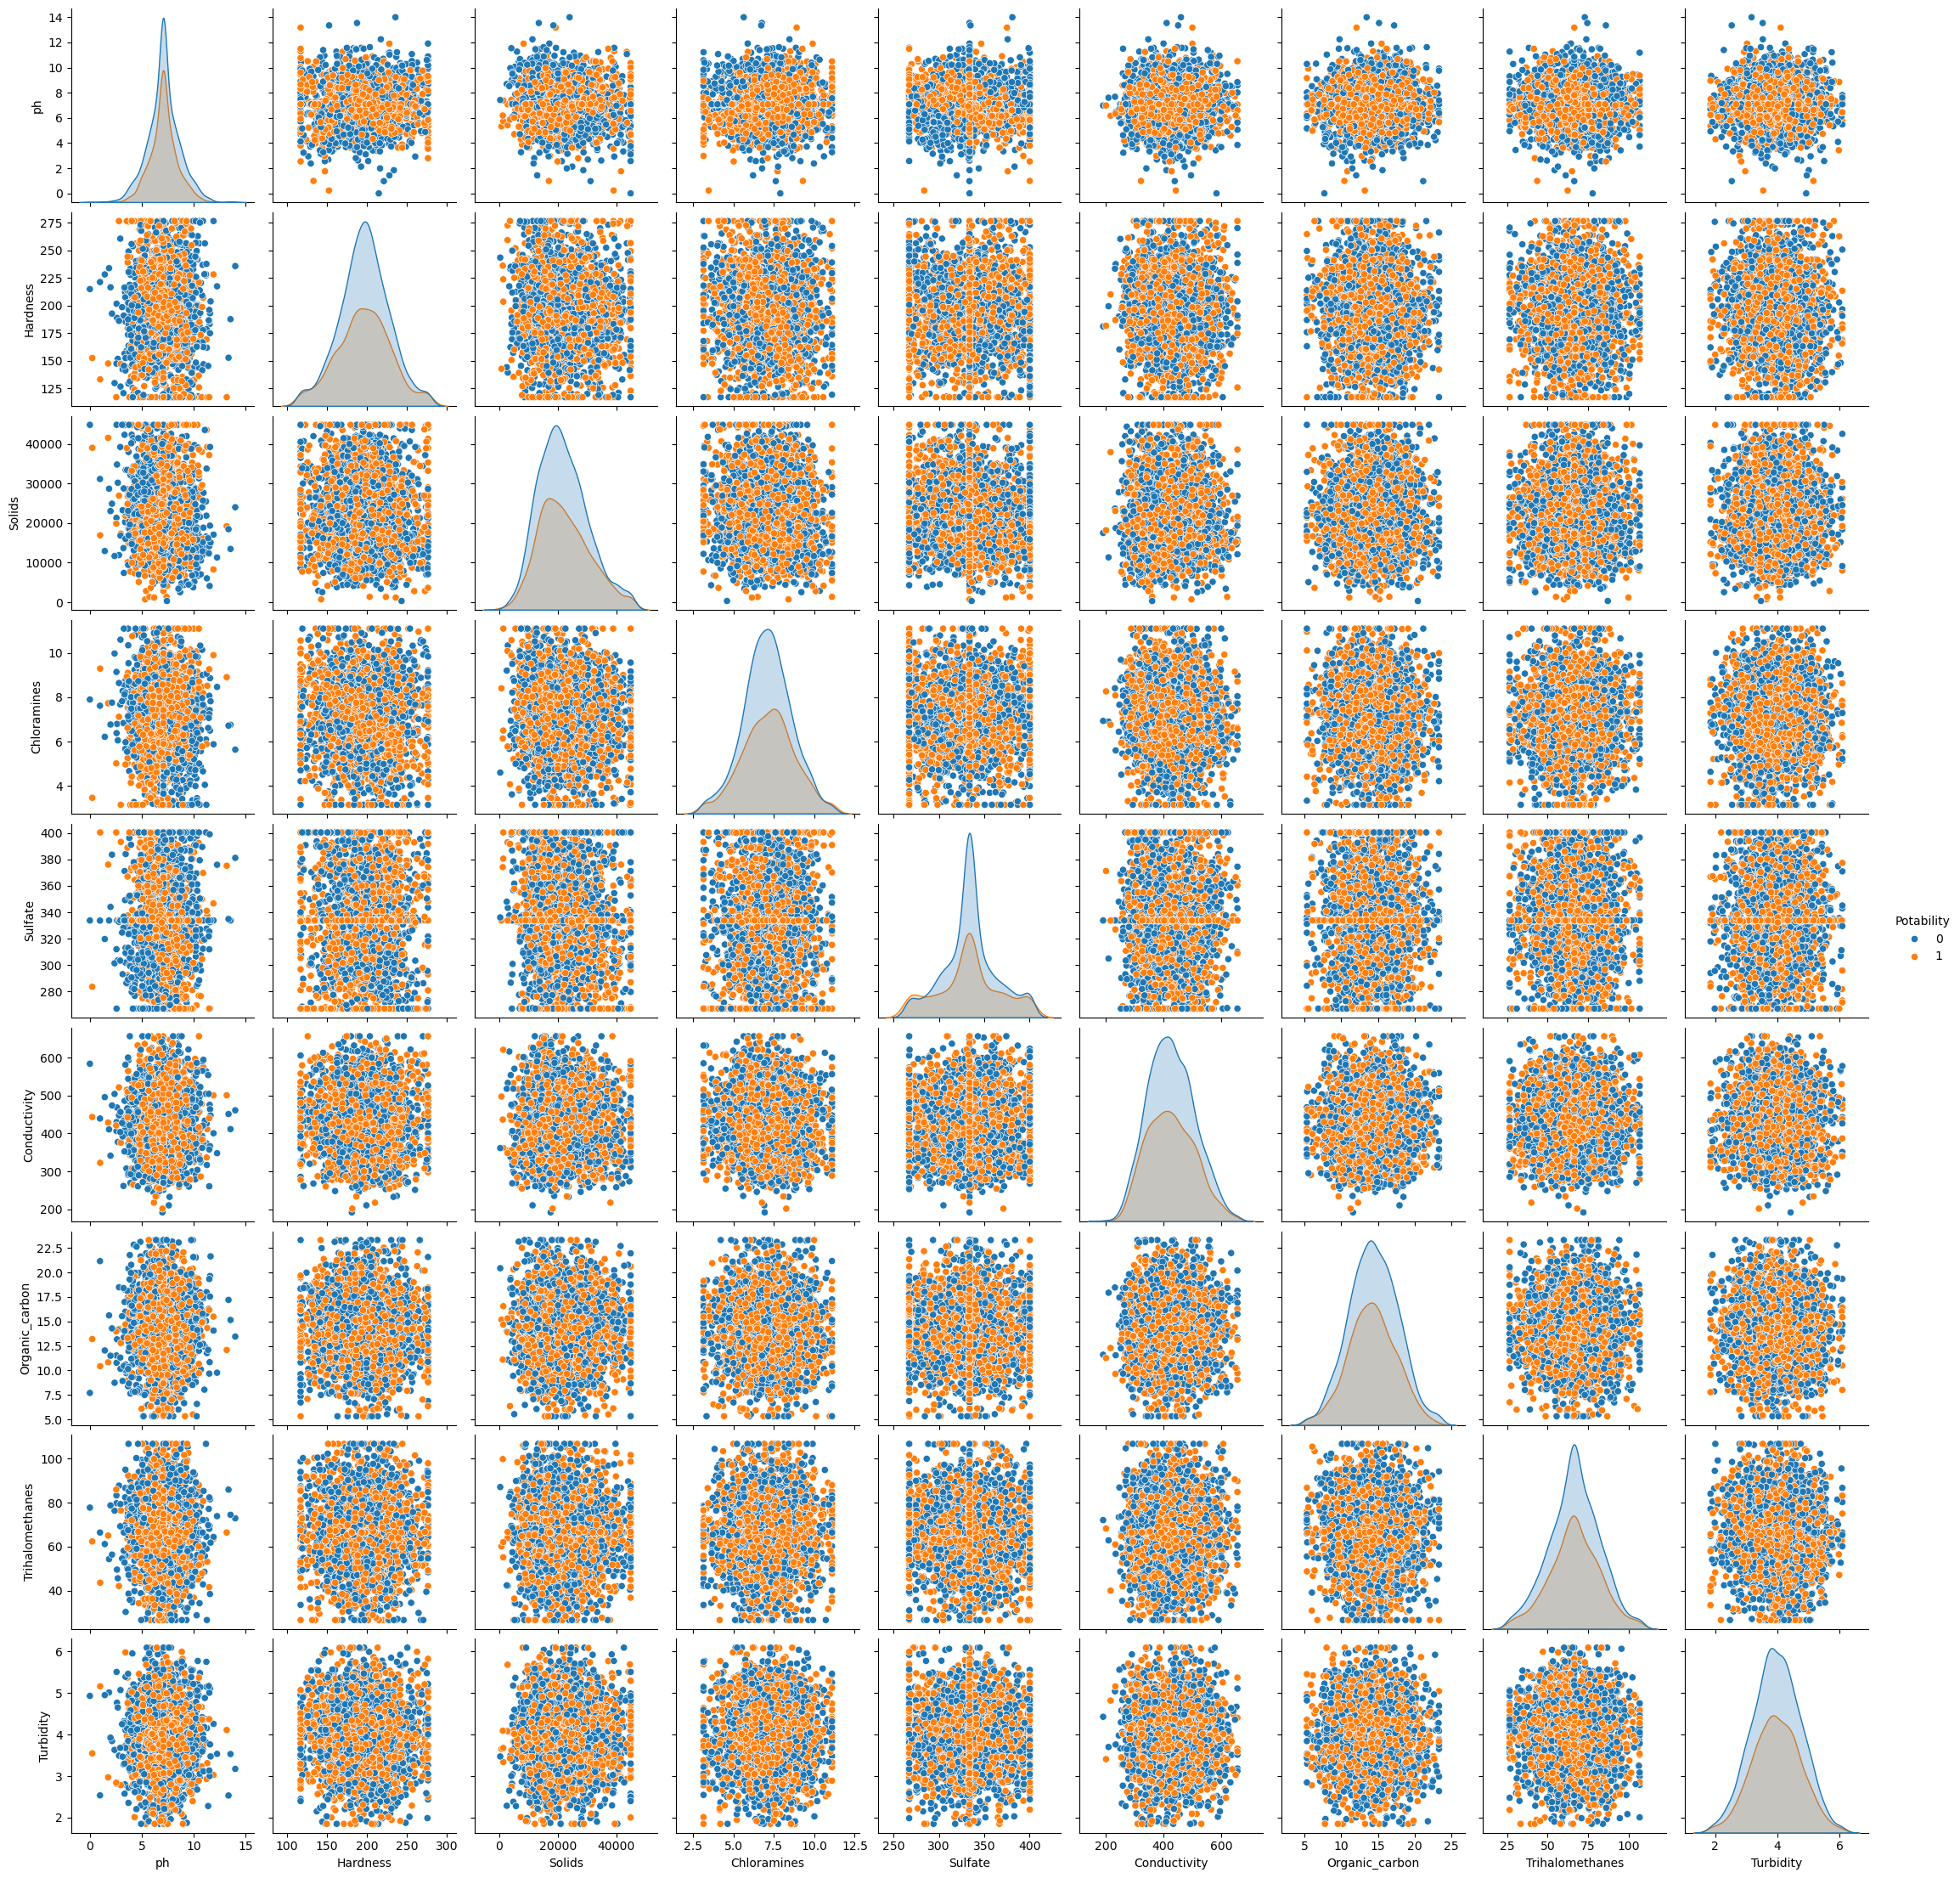

In [31]:
sns.pairplot(df,hue='Potability')

<Axes: >

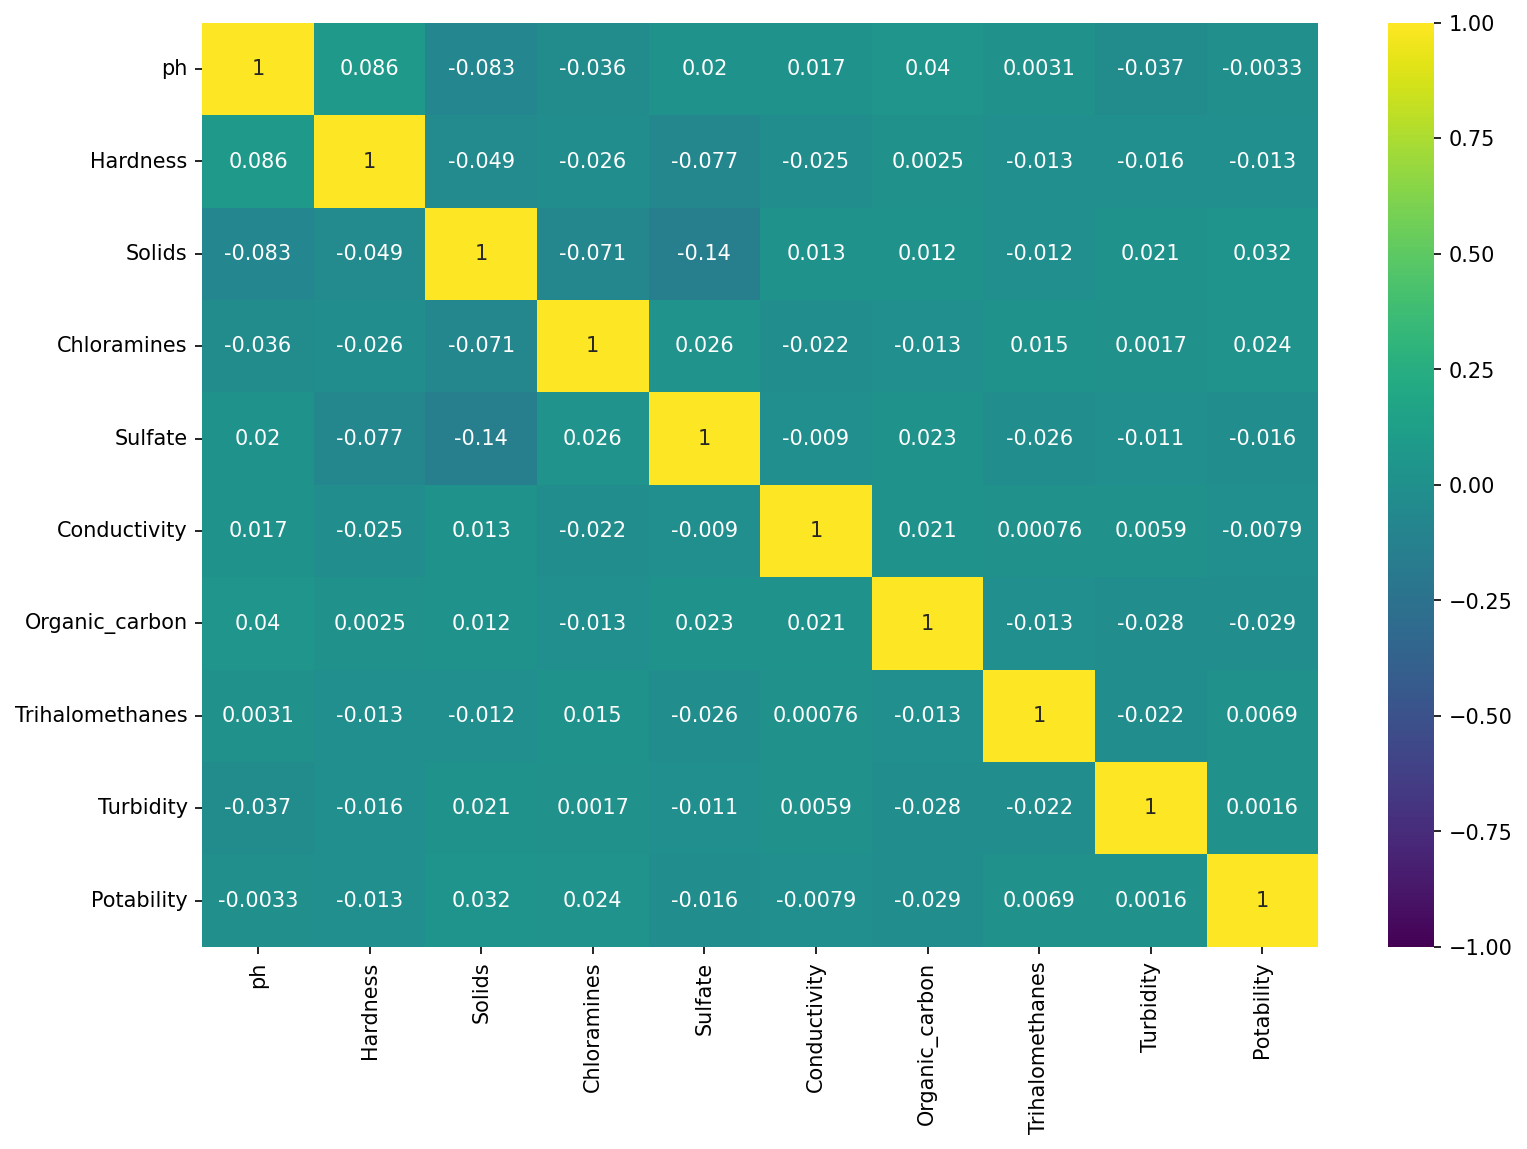

In [33]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

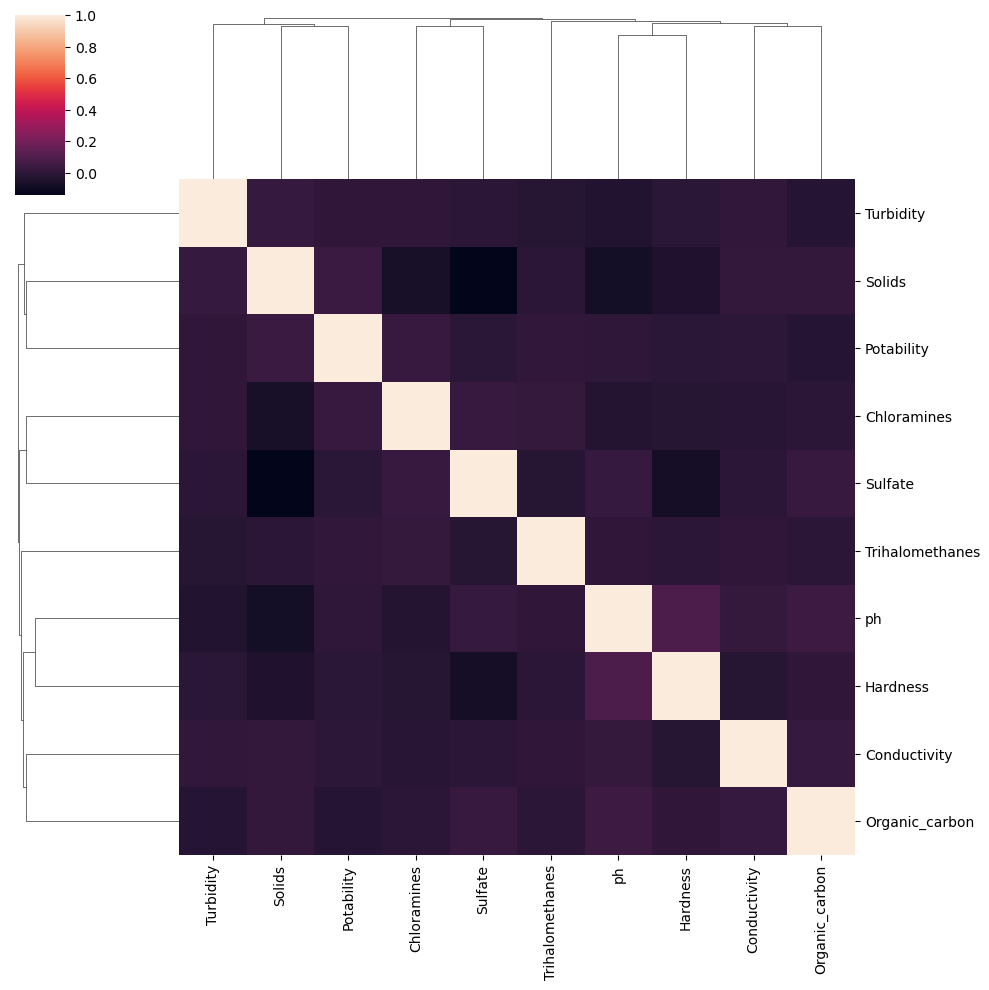

In [35]:
sns.clustermap(df.corr(),)

In [37]:
X = df.drop('Potability',axis=1)
y = df.Potability

In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -6.043133e-16  0.265461 -0.135691     0.115564  1.093335      1.715401   
1 -2.289339e+00 -2.091993 -0.387249    -0.315144 -0.000406      2.070162   
2  6.928678e-01  0.869786 -0.238325     1.395235 -0.000406     -0.093403   
3  8.409504e-01  0.561689  0.007136     0.607257  0.727178     -0.780410   
4  1.368569e+00 -0.477657 -0.463030    -0.372561 -0.744666     -0.344116   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.187299         1.328436  -1.292657  
1        0.272685        -0.651695   0.687944  
2        0.786278        -0.000022  -1.173116  
3        1.263149         2.190618   0.852978  
4       -0.828861        -2.222985   0.139720

In [41]:
X = X.dropna()
y = y[X.index]  # Keep y aligned with X


In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Use "median" or "most_frequent" if needed
X = imputer.fit_transform(X)


In [45]:
import numpy as np

print("Number of NaN values in X:", np.isnan(X).sum())  # Should be 0


Number of NaN values in X: 0


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

base_log_model = LogisticRegression()
base_log_model.fit(X_train,y_train)

LogisticRegression()

In [56]:
from sklearn.metrics import classification_report

lr_pred = base_log_model.predict(X_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



# Cross Validation of Logistic Regression model

In [59]:
from sklearn.model_selection import cross_validate

cv_log_model = pd.DataFrame(cross_validate(base_log_model,X_train,y_train,scoring=['accuracy','precision','recall','f1','roc_auc'],cv=10,verbose=2))
cv_log_model

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1  \
0  0.002005    0.006924       0.617391             0.0          0.0      0.0   
1  0.004001    0.030412       0.617391             0.0          0.0      0.0   
2  0.000000    0.011612       0.617391             0.0          0.0      0.0   
3  0.002674    0.010479       0.615721             0.0          0.0      0.0   
4  0.002334    0.000999       0.606987             0.0          0.0      0.0   
5  0.005207    0.005021       0.615721             0.0          0.0      0.0   
6  0.000818    0.005016       0.615721             0.0          0.0      0.0   
7  0.001713    0.000000       0.615721             0.0          0.0      0.0   
8  0.000000    0.000000       0.615721             0.0          0.0      0.0   
9  0.000000    0.015004       0.615721             0.0          0.0      0.0   

   test_roc_auc  
0      0.498319  
1      0.512084  
2      0.462628  
3      0.556093  
4      0.452289  
5      0.564797  
6      0.493391  
7      0.539894  
8      0.527563  
9      0.479691

In [61]:
cv_log_model.test_accuracy.mean()

0.6153483956711601

# Searching for appropriate value of no. of neighbors for KNN algorithm


In [64]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1,21):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    scores.append(knc.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

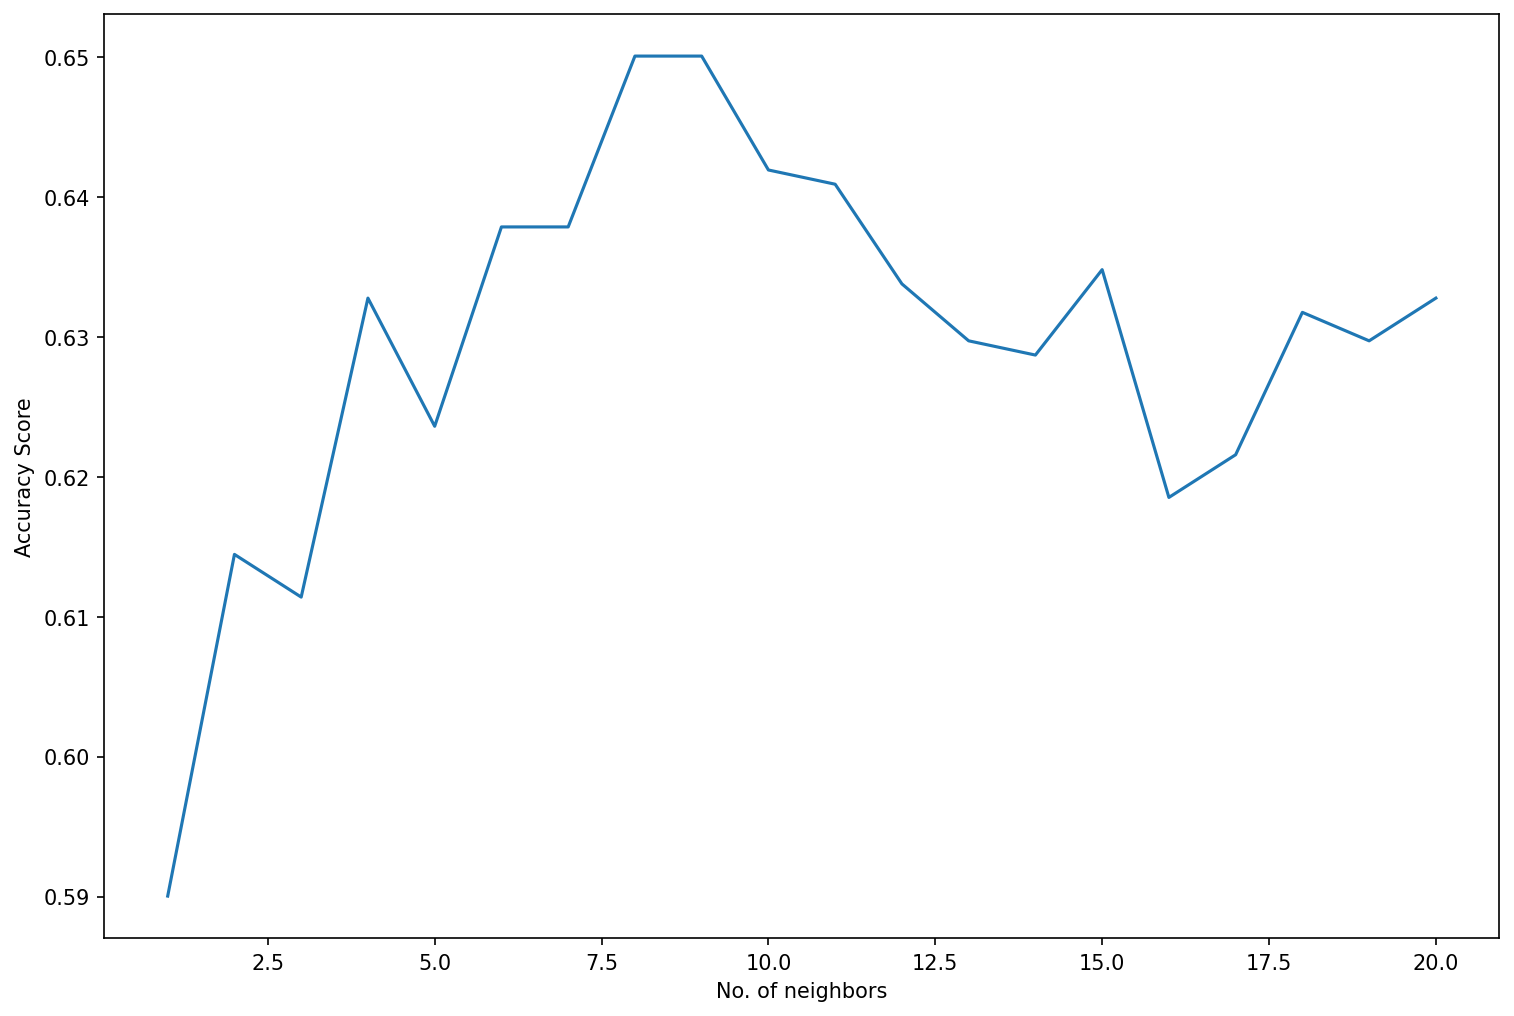

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=range(1, 21), y=scores)  # Use keyword arguments
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

# K Nearest Neighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
knc_pred = knc.predict(X_test)
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       585
           1       0.49      0.51      0.50       398

    accuracy                           0.59       983
   macro avg       0.58      0.58      0.58       983
weighted avg       0.59      0.59      0.59       983



# Support Vector Classifier

In [75]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [77]:
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       585
           1       0.69      0.29      0.41       398

    accuracy                           0.66       983
   macro avg       0.67      0.60      0.59       983
weighted avg       0.67      0.66      0.62       983



# Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
dtree_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       585
           1       0.45      0.45      0.45       398

    accuracy                           0.55       983
   macro avg       0.54      0.54      0.54       983
weighted avg       0.55      0.55      0.55       983



# Searching for suitable value of no. of estimators for Random Forest model

In [85]:
from sklearn.ensemble import RandomForestClassifier
scores = []
for i in range(100,901,100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    scores.append(rfc.score(X_test,y_test))

Text(0, 0.5, 'Accuracy score')

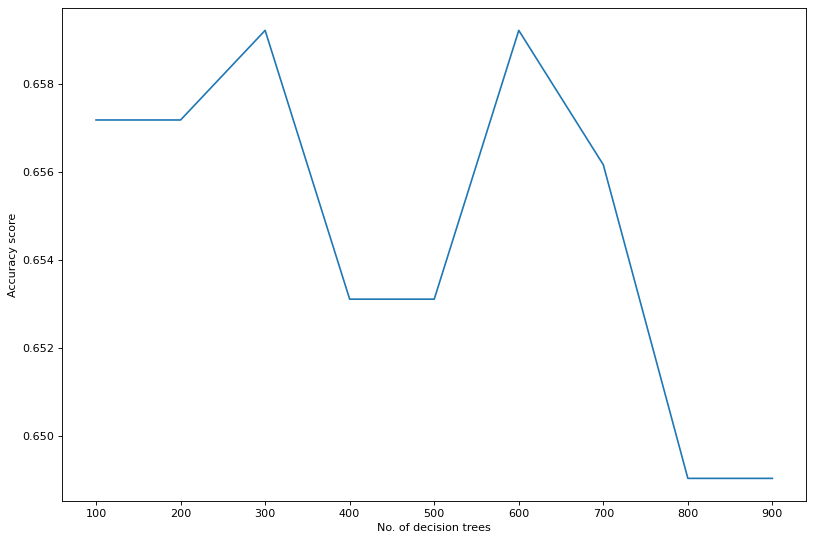

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8), dpi=80)
sns.lineplot(x=range(100, 901, 100), y=scores)  # Use keyword arguments
plt.xlabel('No. of decision trees')
plt.ylabel('Accuracy score')



In [89]:
temp = pd.concat([pd.Series(range(100,901,100)),pd.Series(scores)],axis=1)
temp.columns = ['No. of estimators','Score']
temp = temp.sort_values('Score',ascending=False)
noe = int(temp.iloc[0]['No. of estimators'])
noe

300

# Random Forest Classifier

In [92]:
rfc = RandomForestClassifier(n_estimators=noe)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [94]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       585
           1       0.64      0.29      0.40       398

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.58       983
weighted avg       0.65      0.65      0.61       983



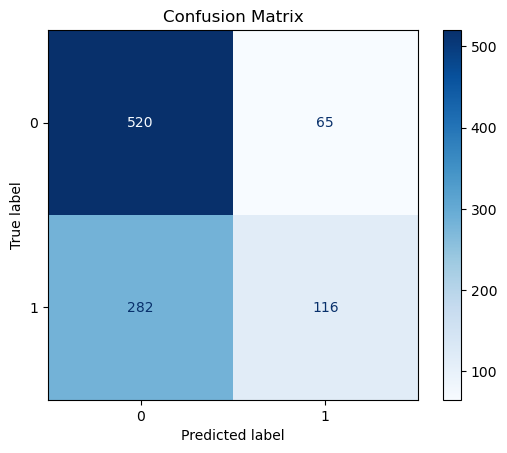

In [96]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(y_test, rfc_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


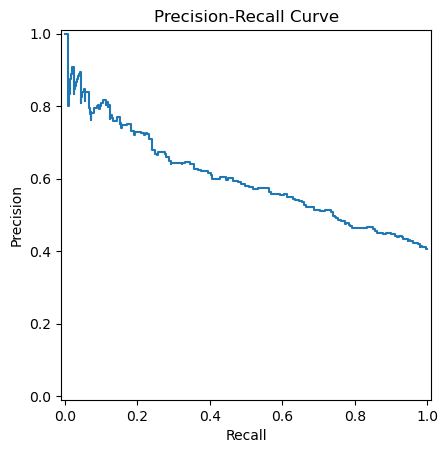

In [98]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, rfc.predict_proba(X_test)[:, 1])

# Display Precision-Recall Curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()


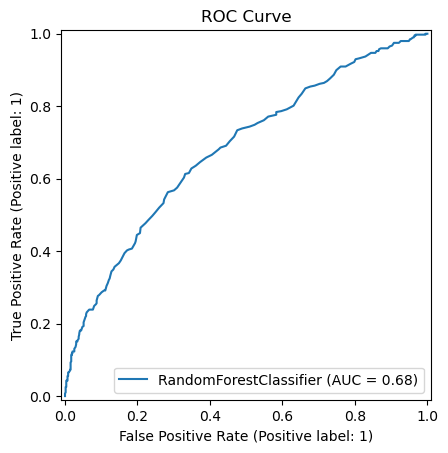

In [100]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC Curve
RocCurveDisplay.from_estimator(rfc, X_test, y_test)

plt.title('ROC Curve')
plt.show()


# Feature Importance

<Axes: xlabel='Importance', ylabel='Feature'>

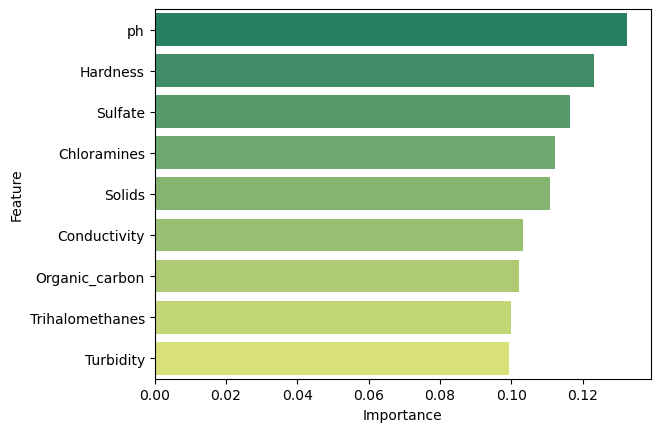

In [103]:
temp = pd.concat([pd.Series(features),pd.Series(rfc.feature_importances_)],axis=1)
temp.columns = ['Feature','Importance']
temp = temp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=temp,orient='h',palette='summer')

# XG Boost Classifier

In [106]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       585
           1       0.57      0.42      0.49       398

    accuracy                           0.64       983
   macro avg       0.62      0.60      0.60       983
weighted avg       0.63      0.64      0.63       983



# Gradient Boosting Classifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


GradientBoostingClassifier()

In [113]:
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74       585
           1       0.59      0.23      0.33       398

    accuracy                           0.62       983
   macro avg       0.61      0.56      0.53       983
weighted avg       0.62      0.62      0.57       983



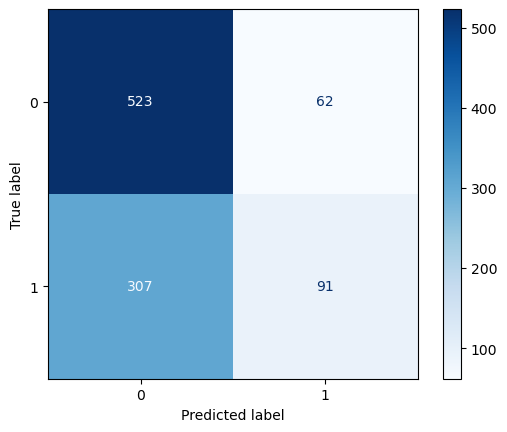

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, gbc.predict(X_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can change the color map
plt.show()


# Gaussian Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

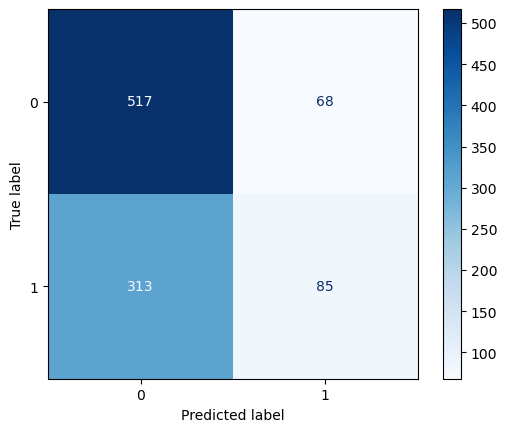

              precision    recall  f1-score   support

           0       0.62      0.88      0.73       585
           1       0.56      0.21      0.31       398

    accuracy                           0.61       983
   macro avg       0.59      0.55      0.52       983
weighted avg       0.60      0.61      0.56       983



In [122]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate predictions
gnb_pred = gnb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, gnb_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can use other colormaps like 'viridis' or 'Reds'
plt.show()

# Print classification report
print(classification_report(y_test, gnb_pred))


# Bernoulli Naive Bayes

In [125]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

[[585   0]
 [398   0]]


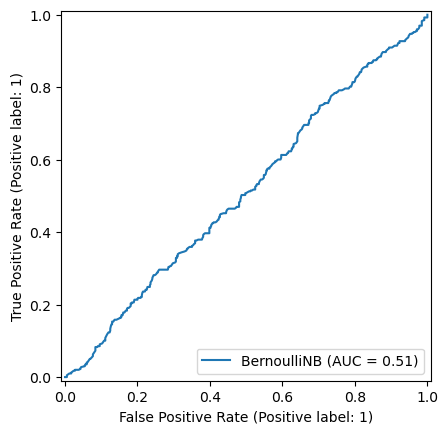

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



In [127]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate predictions
bnb_pred = bnb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, bnb_pred)

# Print confusion matrix
print(cm)

# Display ROC curve
RocCurveDisplay.from_estimator(bnb, X_test, y_test)
plt.show()

# Print classification report
print(classification_report(y_test, bnb_pred))


# SGD Classifier

In [130]:
from sklearn.linear_model import SGDClassifier

# Create and train the model
sgd = SGDClassifier()
sgd.fit(X_train, y_train)


SGDClassifier()

In [132]:
sgd_pred = sgd.predict(X_test)
print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67       585
           1       0.44      0.31      0.37       398

    accuracy                           0.56       983
   macro avg       0.53      0.52      0.52       983
weighted avg       0.54      0.56      0.54       983



# Ridge Classifier

In [135]:
from sklearn.linear_model import RidgeClassifier

# Create and train the model
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)


RidgeClassifier()

In [137]:
ridge_pred = ridge.predict(X_test)
print(classification_report(y_test,ridge_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



# Passive Aggressive Classifier

In [140]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Create and train the model
passive_classifier = PassiveAggressiveClassifier()
passive_classifier.fit(X_train, y_train)


PassiveAggressiveClassifier()

In [142]:
pac_pred = passive_classifier.predict(X_test)
print(classification_report(y_test,pac_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       585
           1       0.40      0.46      0.43       398

    accuracy                           0.51       983
   macro avg       0.50      0.50      0.50       983
weighted avg       0.52      0.51      0.51       983



# Voting Classifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

model = VotingClassifier(estimators=[
                                     ('GBC',GradientBoostingClassifier()),
                                     ('XGB',XGBClassifier()),
                                     ('RF',RandomForestClassifier()),
                                     ('SVC',SVC()),
                                     ('KNC',KNeighborsClassifier(n_neighbors=2)),
                                     ('Cat',CatBoostClassifier()),
                                     ('ET',ExtraTreesClassifier())
                                    ],voting='hard')

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
accuracies = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=RepeatedStratifiedKFold(n_repeats=2,n_splits=5))
print("Mean Accuracy of Voting Classifier:",str(np.round(accuracies.mean()*100,2)) + '%')

Learning rate set to 0.013348
0:	learn: 0.6909387	total: 170ms	remaining: 2m 49s
1:	learn: 0.6895112	total: 171ms	remaining: 1m 25s
2:	learn: 0.6876096	total: 173ms	remaining: 57.6s
3:	learn: 0.6859126	total: 175ms	remaining: 43.6s
4:	learn: 0.6842850	total: 177ms	remaining: 35.2s
5:	learn: 0.6828752	total: 178ms	remaining: 29.6s
6:	learn: 0.6810050	total: 180ms	remaining: 25.6s
7:	learn: 0.6795462	total: 182ms	remaining: 22.6s
8:	learn: 0.6782940	total: 184ms	remaining: 20.2s
9:	learn: 0.6766968	total: 186ms	remaining: 18.4s
10:	learn: 0.6753696	total: 188ms	remaining: 16.9s
11:	learn: 0.6734879	total: 191ms	remaining: 15.7s
12:	learn: 0.6722408	total: 193ms	remaining: 14.6s
13:	learn: 0.6708190	total: 195ms	remaining: 13.7s
14:	learn: 0.6693218	total: 197ms	remaining: 12.9s
15:	learn: 0.6675655	total: 199ms	remaining: 12.2s
16:	learn: 0.6661417	total: 201ms	remaining: 11.6s
17:	learn: 0.6643348	total: 203ms	remaining: 11.1s
18:	learn: 0.6628238	total: 206ms	remaining: 10.6s
19:	learn

In [153]:
# Fit the model on training data
model.fit(X_train, y_train)

# Now you can make predictions on the test data
vc_pred = model.predict(X_test)

# Print the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, vc_pred))
print(classification_report(y_test, vc_pred))


Learning rate set to 0.014683
0:	learn: 0.6908260	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6893632	total: 19.2ms	remaining: 9.6s
2:	learn: 0.6870339	total: 29ms	remaining: 9.63s
3:	learn: 0.6849315	total: 38.3ms	remaining: 9.54s
4:	learn: 0.6827451	total: 48.2ms	remaining: 9.59s
5:	learn: 0.6811968	total: 58.6ms	remaining: 9.71s
6:	learn: 0.6795774	total: 67.1ms	remaining: 9.52s
7:	learn: 0.6782710	total: 75.6ms	remaining: 9.38s
8:	learn: 0.6771108	total: 84.1ms	remaining: 9.26s
9:	learn: 0.6752115	total: 93.2ms	remaining: 9.22s
10:	learn: 0.6736087	total: 102ms	remaining: 9.21s
11:	learn: 0.6719700	total: 111ms	remaining: 9.11s
12:	learn: 0.6702540	total: 119ms	remaining: 9.01s
13:	learn: 0.6687282	total: 127ms	remaining: 8.95s
14:	learn: 0.6672408	total: 135ms	remaining: 8.89s
15:	learn: 0.6661727	total: 144ms	remaining: 8.84s
16:	learn: 0.6643331	total: 152ms	remaining: 8.8s
17:	learn: 0.6625441	total: 161ms	remaining: 8.81s
18:	learn: 0.6609088	total: 171ms	remaining: 8.81s
19:	l

# AdaBoost Classifier

In [156]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [158]:
ada_pred = ada.predict(X_test)
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       585
           1       0.51      0.23      0.32       398

    accuracy                           0.60       983
   macro avg       0.56      0.54      0.52       983
weighted avg       0.58      0.60      0.55       983



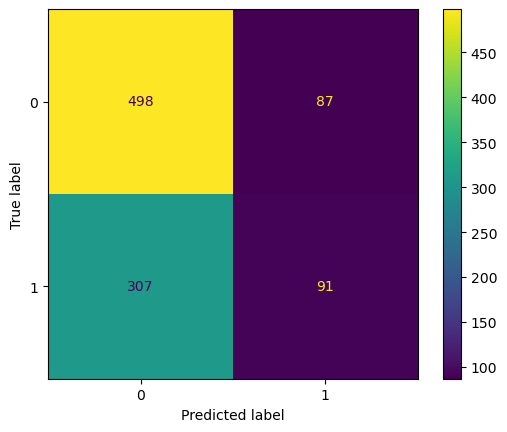

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, ada.predict(X_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# CatBoost Classifier

In [163]:
catboost = CatBoostClassifier(random_state=1)
catboost.fit(X_train,y_train)

Learning rate set to 0.014683
0:	learn: 0.6914338	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6891998	total: 20.1ms	remaining: 10.1s
2:	learn: 0.6879033	total: 31.1ms	remaining: 10.3s
3:	learn: 0.6865070	total: 41ms	remaining: 10.2s
4:	learn: 0.6846374	total: 50.1ms	remaining: 9.97s
5:	learn: 0.6833667	total: 61.3ms	remaining: 10.2s
6:	learn: 0.6814774	total: 71.9ms	remaining: 10.2s
7:	learn: 0.6800943	total: 80.5ms	remaining: 9.99s
8:	learn: 0.6784414	total: 88.7ms	remaining: 9.77s
9:	learn: 0.6766540	total: 98.5ms	remaining: 9.75s
10:	learn: 0.6747813	total: 107ms	remaining: 9.66s
11:	learn: 0.6729794	total: 115ms	remaining: 9.5s
12:	learn: 0.6718806	total: 124ms	remaining: 9.39s
13:	learn: 0.6705916	total: 132ms	remaining: 9.28s
14:	learn: 0.6687430	total: 141ms	remaining: 9.27s
15:	learn: 0.6672778	total: 148ms	remaining: 9.13s
16:	learn: 0.6657888	total: 157ms	remaining: 9.09s
17:	learn: 0.6642979	total: 164ms	remaining: 8.96s
18:	learn: 0.6628124	total: 173ms	remaining: 8.92s
19:	

In [165]:
catboost_pred = catboost.predict(X_test)
catboost_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [167]:
print(confusion_matrix(y_test,catboost_pred))
print(classification_report(y_test,catboost_pred))

[[516  69]
 [265 133]]
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       585
           1       0.66      0.33      0.44       398

    accuracy                           0.66       983
   macro avg       0.66      0.61      0.60       983
weighted avg       0.66      0.66      0.63       983



# Extra Trees Classifier

In [170]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [172]:
etc_pred = etc.predict(X_test)
print(classification_report(y_test,etc_pred))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       585
           1       0.65      0.28      0.39       398

    accuracy                           0.65       983
   macro avg       0.65      0.59      0.57       983
weighted avg       0.65      0.65      0.60       983



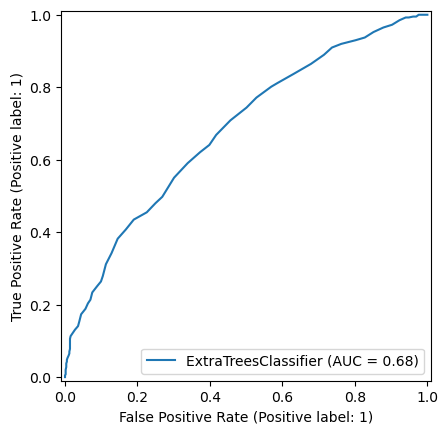

In [174]:
from sklearn.metrics import RocCurveDisplay

# Display the ROC Curve
RocCurveDisplay.from_estimator(etc, X_test, y_test)


# Light GBM Classifier

In [177]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 880, number of negative: 1413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2293, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383777 -> initscore=-0.473548
[LightGBM] [Info] Start training from score -0.473548


LGBMClassifier()

In [179]:
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test,lgbm_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       585
           1       0.58      0.38      0.46       398

    accuracy                           0.64       983
   macro avg       0.62      0.60      0.60       983
weighted avg       0.63      0.64      0.62       983



# Histogram Gradient Boosting Classifier

In [182]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [184]:
hgbc_pred = hgbc.predict(X_test)
print(classification_report(y_test,hgbc_pred))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72       585
           1       0.57      0.37      0.45       398

    accuracy                           0.63       983
   macro avg       0.61      0.59      0.59       983
weighted avg       0.62      0.63      0.61       983



# Boosting Classifier

In [187]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag.fit(X_train, y_train)


BaggingClassifier()

In [189]:
bag_pred = bag.predict(X_test)
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       585
           1       0.63      0.32      0.43       398

    accuracy                           0.65       983
   macro avg       0.64      0.60      0.59       983
weighted avg       0.64      0.65      0.62       983



# Model Performance Analysis

In [192]:
from sklearn.metrics import accuracy_score
print('Accuracy Score of Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('Accuracy Score of SGD Classifier:',str(np.round(accuracy_score(y_test,sgd_pred)*100,2)) + '%')
print('Accuracy Score of Passive Aggressive Classifier:',str(np.round(accuracy_score(y_test,pac_pred)*100,2)) + '%')
print('Accuracy Score of Ridge Classifier:',str(np.round(accuracy_score(y_test,ridge_pred)*100,2)) + '%')
print('Accuracy Score of Gaussian Naive Bayes:',str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print('Accuracy Score of Bernoulli Naive Bayes:',str(np.round(accuracy_score(y_test,bnb_pred)*100,2)) + '%')
print('Accuracy Score of K Neighbors Classifier:',str(np.round(accuracy_score(y_test,knc_pred)*100,2)) + '%')
print('Accuracy Score of Support Vector Classifier:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')
print('Accuracy Score of Decision Tree Classifier:',str(np.round(accuracy_score(y_test,dtree_pred)*100,2)) + '%')
print('Accuracy Score of Random Forest Classifier:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')
print('Accuracy Score of XG Boost Classifier:',str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')
print('Accuracy Score of Gradient Boosting Classifier:',str(np.round(accuracy_score(y_test,gbc_pred)*100,2)) + '%')
print('Accuracy Score of Voting Classifier:',str(np.round(accuracy_score(y_test,vc_pred)*100,2)) + '%')
print('Accuracy Score of CatBoost Classifier:',str(np.round(accuracy_score(y_test,catboost_pred)*100,2)) + '%')
print('Accuracy Score of AdaBoost Classifier:',str(np.round(accuracy_score(y_test,ada_pred)*100,2)) + '%')
print('Accuracy Score of Extra Trees Classifier:',str(np.round(accuracy_score(y_test,etc_pred)*100,2)) + '%')
print('Accuracy Score of LGBM Classifier:',str(np.round(accuracy_score(y_test,lgbm_pred)*100,2)) + '%')
print('Accuracy Score of Hist Gradient Boosting Classifier:',str(np.round(accuracy_score(y_test,hgbc_pred)*100,2)) + '%')
print('Accuracy Score of Bagging Classifier:',str(np.round(accuracy_score(y_test,bag_pred)*100,2)) + '%')

Accuracy Score of Logistic Regression: 59.51%
Accuracy Score of SGD Classifier: 56.26%
Accuracy Score of Passive Aggressive Classifier: 50.56%
Accuracy Score of Ridge Classifier: 59.51%
Accuracy Score of Gaussian Naive Bayes: 61.24%
Accuracy Score of Bernoulli Naive Bayes: 59.51%
Accuracy Score of K Neighbors Classifier: 59.0%
Accuracy Score of Support Vector Classifier: 66.12%
Accuracy Score of Decision Tree Classifier: 55.34%
Accuracy Score of Random Forest Classifier: 64.7%
Accuracy Score of XG Boost Classifier: 63.78%
Accuracy Score of Gradient Boosting Classifier: 62.46%
Accuracy Score of Voting Classifier: 65.82%
Accuracy Score of CatBoost Classifier: 66.02%
Accuracy Score of AdaBoost Classifier: 59.92%
Accuracy Score of Extra Trees Classifier: 64.6%
Accuracy Score of LGBM Classifier: 63.99%
Accuracy Score of Hist Gradient Boosting Classifier: 63.38%
Accuracy Score of Bagging Classifier: 64.9%


# Hyperparameter Tuning using Cross Validation

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

#KNN
para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv

#Random Forest
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#SVC
params_svc = {'C': [.1,1,10,100,1000,10000], 'gamma': [.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid_svc = GridSearchCV(svc, param_grid = params_svc, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [198]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for SVC:", grid_svc.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 29}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
Best parameters for SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best parameters for XGBoost: {'n_estimators': 50, 'learning_rate': 0.5}


In [200]:
models = [('KNN', knn), ('DT', dt), ('RF', rf), 
          ('SVC', svc), ('XGBoost', xgb)]

for model_name, model in models:
 
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(model_name,':',str(np.round(accuracy*100,2)) + '%')

KNN : 62.36%
DT : 55.65%
RF : 64.9%
SVC : 66.12%
XGBoost : 63.78%


# Saving the model for future use

In [203]:
joblib.dump(etc,'model.pkl')

['model.pkl']

In [205]:
model = joblib.load('model.pkl')
model

ExtraTreesClassifier()